In [1]:
# Pandas dan Numpy
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)

# Problem Statement
Sebagai tugas akhir dari masa kontrakmu sebagai intern Data Scientist di ID/X Partners, kali ini kamu akan dilibatkan dalam projek dari sebuah lending company. Kamu akan berkolaborasi dengan berbagai departemen lain dalam projek ini untuk menyediakan solusi teknologi bagi company tersebut.

Kamu diminta untuk membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak. Selain itu kamu juga perlu mempersiapkan media visual untuk mempresentasikan solusi ke klien. Pastikan media visual yang kamu buat jelas, mudah dibaca, dan komunikatif. Pengerjaan end-to-end solution ini dapat dilakukan di Programming Language pilihanmu dengan tetap mengacu kepada framework/methodology Data Science.

# Goal

Determine credit risk category of bank customers: Good or Bad.

# Exploring Data

In [2]:
df = pd.read_csv('/content/loan_data_2007_2014 (1).csv', engine='python', sep=None)

In [3]:
pd.set_option('display.max_columns', None)
df.sample(1)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
28764,28764,534009,690234,2000,2000,2000.0,36 months,11.49,65.95,B,B4,NaN,10+ years,OWN,56000.0,Not Verified,Jun-10,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 06/21/10 > Re: Investor qu...,small_business,Car Improvement,060xx,CT,13.26,0.0,Jun-78,2.0,65.0,103.0,14.0,1.0,18136.0,84.7,23.0,f,0.0,0.0,1620.51,1620.51,1217.74,328.64,29.895455,44.23,0.63,Sep-12,66.0,NaN,Dec-12,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Feature Explanation**

In [5]:
fd = pd.read_csv('/content/loan_data_2007_2014 (1).csv')

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option("max_colwidth", 100)
fd.head(78)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599.0,5000.0,5000.0,4975.00000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.000000,0.00,0.0000,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167.0,2500.0,2500.0,2500.00000,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking a...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.000000,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524.0,2400.0,2400.0,2400.00000,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.000000,0.00,0.0000,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178.0,10000.0,10000.0,10000.00000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & ...",other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598.0,21.00,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.970000,0.00,0.0000,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748.0,3000.0,3000.0,3000.00000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,Borrower added on 12/21/11 > I plan on combining three large interest bills together and freei...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783.0,53.90,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.000000,0.00,0.0000,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441.0,5000.0,5000.0,5000.00000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://www.len

In [7]:
df.id.nunique()

76162

In [8]:
df.member_id.nunique()

76162

1 row of data represents 1 borrower.

In [9]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76162 entries, 0 to 76161
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   76162 non-null  int64  
 1   id                           76162 non-null  int64  
 2   member_id                    76162 non-null  int64  
 3   loan_amnt                    76162 non-null  int64  
 4   funded_amnt                  76162 non-null  int64  
 5   funded_amnt_inv              76162 non-null  float64
 6   term                         76162 non-null  object 
 7   int_rate                     76162 non-null  float64
 8   installment                  76162 non-null  float64
 9   grade                        76162 non-null  object 
 10  sub_grade                    76162 non-null  object 
 11  emp_title                    71277 non-null  object 
 12  emp_length                   73510 non-null  object 
 13  home_ownership  

In [10]:
# check duplicate rows
df.duplicated().sum()

0

In [11]:
# check missing values
df.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0


In [12]:
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13'], dtype=object)

In [13]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [14]:
df['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [15]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational', None], dtype=object)

In [16]:
df['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'Jan-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12',
       'Feb-13', 'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13',
       'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15', 'Dec-15', 'Jan-12',
       'Oct-15', 'Nov-14', 'Mar-12', 'May-12', 'Jun-15', 'May-15',
       'Jul-15', 'Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10',
       'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09',
       'Jul-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09',
       'Jan-09', 'Dec-08', 'Oct-08', 'Aug-08', 'Jul-08', 

In [17]:
df['last_credit_pull_d'].unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

In [18]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [19]:
df['initial_list_status'].unique()

array(['f', 'w', None], dtype=object)

In [20]:
df['application_type'].unique()

array(['INDIVIDUAL', None], dtype=object)

In [21]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [22]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [23]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [24]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

**Drop columns**

More than 70% missing values: mths_since_last_record, mths_since_last_major_derog, annual_inc_joint, dti_joint, verification_status_joint, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi, total_cu_tl, inq_last_12m, mths_since_last_delinq.

Identifiers: Unnamed: 0, member id, url, title, desc, zip_code, emp_title, addr_state, and policy_code.

Drop sub_grad as it is similar as the grade column.

Drop dti_joint because it is similar to dti.

Drop out_prncp_inv because it is similar to out_prncp.

Drop total_pymnt_inv because it is similar to total_pymnt.

Drop funded_amnt_inv because it is similar to funded_amnt

Drop features that contain information about the outcome: next_pymnt, recoveries.

Drop application_type because only 1 unique value.

Columns that are not relevant to predicting bad borrowers: collection_recovery_fee, pymnt_plan (there is no description for this column)

For now, column id will not be erased in case groupby id is needed later.

In [25]:
# drop unneeded columns
df.drop(['mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint',
         'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
         'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
         'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_last_delinq',
         'Unnamed: 0', 'id', 'member_id', 'url', 'title', 'desc', 'zip_code', 'emp_title', 'addr_state', 'policy_code',
         'sub_grade', 'dti_joint', 'out_prncp_inv', 'total_pymnt_inv', 'funded_amnt_inv',
         'next_pymnt_d', 'recoveries', 'application_type',
         'collection_recovery_fee', 'pymnt_plan'], axis=1, inplace=True)

# Defining Label

In [26]:
df.loan_status.value_counts()

,count
loan_status,
Fully Paid,44309
Current,19538
Charged Off,8559
Does not meet the credit policy. Status:Fully Paid,1988
Does not meet the credit policy. Status:Charged Off,761
Late (31-120 days),583
In Grace Period,258
Late (16-30 days),108
Default,58


We define a "bad" borrower as a member that is: Charged Off, Late (31-120 days), Default, or Does not meet the credit policy. Status:Charged Off

In [27]:
# create new column as target
df['bad'] = np.where(df['loan_status'].isin(['Charged Off', 'Late (31-120 days)',
                                                     'Default',
                                                      'Does not meet the credit policy. Status:Charged Off']),
                              1, 0)

In [28]:
# drop loan_status
df.drop(['loan_status'], axis=1, inplace=True)

In [29]:
df['bad'].value_counts(normalize=True)*100

,proportion
bad,
0,86.921299
1,13.078701


After labeling as bad/good loan, the number of people who have bad loan is much smaller than people with good loan -> imbalanced dataset. Later we will address this imbalance by oversampling (SMOTE).

# Data Preprocessing

In [30]:
df1 = df.copy()

In [31]:
# check missing values
df1.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length,2652
home_ownership,0
annual_inc,4
verification_status,0


### emp_length

In [32]:
df1['emp_length'] = df1['emp_length'].str.replace('10+ years', '10')
df1['emp_length'] = df1['emp_length'].str.replace('< 1 year', '0.5')
df1['emp_length'] = df1['emp_length'].str.replace(' years', '')
df1['emp_length'] = df1['emp_length'].str.replace(' year', '')

In [33]:
df1['emp_length'] = df1['emp_length'].str.replace('10+', '10')

In [34]:
df1['emp_length'].unique()

array(['10', '0.5', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [35]:
df1['emp_length'] = pd.to_numeric(df1['emp_length'])

In [36]:
# impute emp_length with 0
df1['emp_length'].fillna(value = 0, inplace = True)

In [37]:
df1['emp_length'].unique()

array([10. ,  0.5,  1. ,  3. ,  8. ,  9. ,  4. ,  5. ,  6. ,  2. ,  7. ,
        0. ])

In [38]:
df1['earliest_cr_line'] = df1['earliest_cr_line'].fillna(df1['earliest_cr_line'].mode()[0])

In [39]:
df1['earliest_cr_line'].isnull().sum()

0

In [40]:
df1['last_pymnt_d'] = df1['last_pymnt_d'].fillna(df1['last_pymnt_d'].mode()[0])

In [41]:
df1['last_pymnt_d'].isnull().sum()

0

In [42]:
df1['last_credit_pull_d'] = df1['last_credit_pull_d'].fillna(df1['last_credit_pull_d'].mode()[0])

In [43]:
df1['last_credit_pull_d'].isnull().sum()

0

In [44]:
df1['annual_inc'] = df1['annual_inc'].fillna(df1['annual_inc'].median())

In [45]:
df1['annual_inc'].isnull().sum()

0

In [46]:
df1['delinq_2yrs'].fillna(0, inplace = True)

In [47]:
df1['delinq_2yrs'].isnull().sum()

0

In [48]:
# inq_last_6mths
df1['inq_last_6mths'].fillna(0, inplace = True)

In [49]:
df1['inq_last_6mths'].isnull().sum()

0

In [50]:
# open_acc
df1['open_acc'].fillna(0, inplace = True)

In [51]:
df1['open_acc'].isnull().sum()

0

In [52]:
# pub_rec
df1['pub_rec'].fillna(0, inplace = True)

In [53]:
df1['pub_rec'].isnull().sum()

0

In [54]:
# revol_util
df1['revol_util'] = df1['revol_util'].fillna(df1['revol_util'].median())

In [55]:
df1['revol_util'].isnull().sum()

0

In [56]:
# total_acc
df1['total_acc'].fillna(0, inplace = True)

In [57]:
df1['total_acc'].isnull().sum()

0

In [58]:
# collections_12_mths_ex_med
df1['collections_12_mths_ex_med'].fillna(0, inplace = True)

In [59]:
df1['collections_12_mths_ex_med'].isnull().sum()

0

In [60]:
# acc_now_delinq
df1['acc_now_delinq'].fillna(0, inplace = True)

In [61]:
df1['acc_now_delinq'].isnull().sum()

0

In [62]:
# tot_coll_amt
df1['tot_coll_amt'].fillna(0, inplace = True)

In [63]:
df1['tot_coll_amt'].isnull().sum()

0

In [64]:
# tot_cur_bal
df1['tot_cur_bal'].fillna(0, inplace = True)

In [65]:
df1['tot_cur_bal'].isnull().sum()

0

In [66]:
# impute total_rev_hi_lim with same value as funded_amnt
df1['total_rev_hi_lim'].fillna(df1['funded_amnt'], inplace = True)

In [67]:
df1['total_rev_hi_lim'].isnull().sum()

0

In [68]:
df1.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


## date

In [69]:
# change data type 'issue_d' from object to datetime
# change data type 'earliest_cr_line' from object to datetime
# change data type 'last_pymnt_d' from object to datetime
# change data type 'last_credit_pull_d' from object to datetime
# assume present date is the latest date in 'last_pymnt_d'(Last month payment was received) or 'last_credit_pull_d'(The date LC pulled credit for this loan), which is Jan-16

In [70]:
df1['issue_d'] = pd.to_datetime(df1['issue_d'], format='%b-%y')
df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'], format='%b-%y')
df1['last_pymnt_d'] = pd.to_datetime(df1['last_pymnt_d'], format='%b-%y')
df1['last_credit_pull_d'] = pd.to_datetime(df1['last_credit_pull_d'], format='%b-%y')

In [71]:
# convert months to duration (calculate the days/months from that date until present date)
# assume present date is Jan-16
present_date = pd.to_datetime('January 2016')

# Calculate the duration in months
df1['issue_d'] = ((present_date - df1['issue_d']) / pd.Timedelta(days=30)).astype(int)
df1['earliest_cr_line'] = ((present_date - df1['earliest_cr_line']) / pd.Timedelta(days=30)).astype(int)
df1['last_pymnt_d'] = ((present_date - df1['last_pymnt_d']) / pd.Timedelta(days=30)).astype(int)
df1['last_credit_pull_d'] = ((present_date - df1['last_credit_pull_d']) / pd.Timedelta(days=30)).astype(int)

In [72]:
df1['issue_d'].unique()

array([ 49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104,  25,  26,  27])

## term

In [73]:
df1['term'] = df1['term'].str.replace(' months', '')
df1['term'] = df1['term'].str.replace(' ', '')

In [74]:
df1['term'] = pd.to_numeric(df1['term'])

In [75]:
df1['term'].unique()

array([36, 60])

# Feature Selection

In [76]:
# check correlation between features
numerical = df1.select_dtypes(exclude='object')
corr = numerical.corr()
corr

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad
loan_amnt,1.000000,0.991069,0.344339,0.239808,0.946073,0.165658,0.328565,-0.250929,0.111992,0.018347,0.152473,-0.035593,0.226162,-0.045808,0.287931,0.115947,0.267547,0.423222,0.852286,0.756755,0.738748,0.024408,-0.231672,0.383686,-0.159406,0.000452,0.015473,0.002373,0.314252,0.457706,0.018748
funded_amnt,0.991069,1.000000,0.331969,0.243638,0.959228,0.167103,0.325622,-0.269583,0.116680,0.020697,0.147699,-0.036926,0.228605,-0.044144,0.285575,0.120886,0.265919,0.435748,0.855817,0.760460,0.740502,0.023987,-0.244017,0.385427,-0.167975,0.001339,0.016438,0.003705,0.328070,0.467927,0.015595
term,0.344339,0.331969,1.000000,0.442950,0.100686,0.096357,0.044766,-0.101733,0.080980,0.005421,0.039534,0.005985,0.048364,-0.018331,0.048440,0.075644,0.081615,0.305780,0.251691,0.100979,0.537350,0.003775,-0.203630,0.157985,-0.130568,0.003375,0.008825,-0.003668,0.056797,0.087969,0.107240
int_rate,0.239808,0.243638,0.442950,1.000000,0.220435,0.053047,0.015784,-0.227921,0.174935,0.127426,-0.089936,0.153516,0.048019,0.089341,0.052289,0.404802,-0.018401,0.246524,0.178350,0.023482,0.497575,0.055971,-0.183517,0.109071,-0.142903,0.036884,0.039251,0.026804,0.088959,0.052871,0.162237
installment,0.946073,0.959228,0.100686,0.220435,1.000000,0.149102,0.328911,-0.267793,0.113548,0.033949,0.132906,-0.021966,0.231440,-0.030960,0.289719,0.144179,0.252686,0.369187,0.831973,0.766983,0.646342,0.031834,-0.211800,0.361509,-0.150823,0.004015,0.019685,0.007068,0.329730,0.459944,0.004130
emp_length,0.165658,0.167103,0.096357,0.053047,0.149102,1.000000,0.120036,-0.168836,0.072725,0.042376,0.185596,-0.024677,0.096492,0.035704,0.113061,0.050128,0.170616,0.118401,0.129983,0.108719,0.131730,-0.022158,-0.153872,0.074513,-0.123161,0.009820,0.014886,0.012429,0.144680,0.137529,-0.015563
annual_inc,0.328565,0.325622,0.044766,0.015784,0.328911,0.120036,1.000000,-0.048828,-0.136985,0.049009,0.162025,0.040500,0.172963,-0.013891,0.307333,0.035527,0.248316,0.105809,0.306066,0.292769,0.213127,0.007934,-0.038937,0.149498,-0.028611,0.003373,0.010298,-0.001266,0.276490,0.243370,-0.045377
issue_d,-0.250929,-0.269583,-0.101733,-0.227921,-0.267793,-0.168836,-0.048828,1.000000,-0.259694,-0.093880,0.039914,0.168680,-0.188861,-0.099950,-0.026241,-0.164228,-0.157040,-0.418721,-0.101783,-0.062462,-0.166392,0.096978,0.826988,-0.132612,0.569086,-0.046772,-0.036076,-0.068967,-0.513858,-0.391316,0.066642
dti,0.111992,0.116680,0.080980,0.174935,0.113548,0.072725,-0.136985,-0.259694,1.000000,0.008788,0.027245,-0.013471,0.332442,-0.012121,0.165028,0.254823,0.261248,0.172042,0.047206,0.007987,0.128665,-0.023978,-0.230274,0.008410,-0.196490,0.010717,0.017288,0.011099,0.138960,0.163391,0.029649
delinq_2yrs,0.018347,0.020697,0.005421,0.127426,0.033949,0.042376,0.049009,-0.093880,0.008788,1.000000,0.074060,0.011977,0.063649,-0.007387,-0.027495,-0.003508,0.115456,0.064688,0.000419,-0.017238,0.045404,0.019620,-0.071951,0.002337,-0.046703,0.021494,0.101948,0.011595,0.120580,0.016781,0.002746


<Axes: >

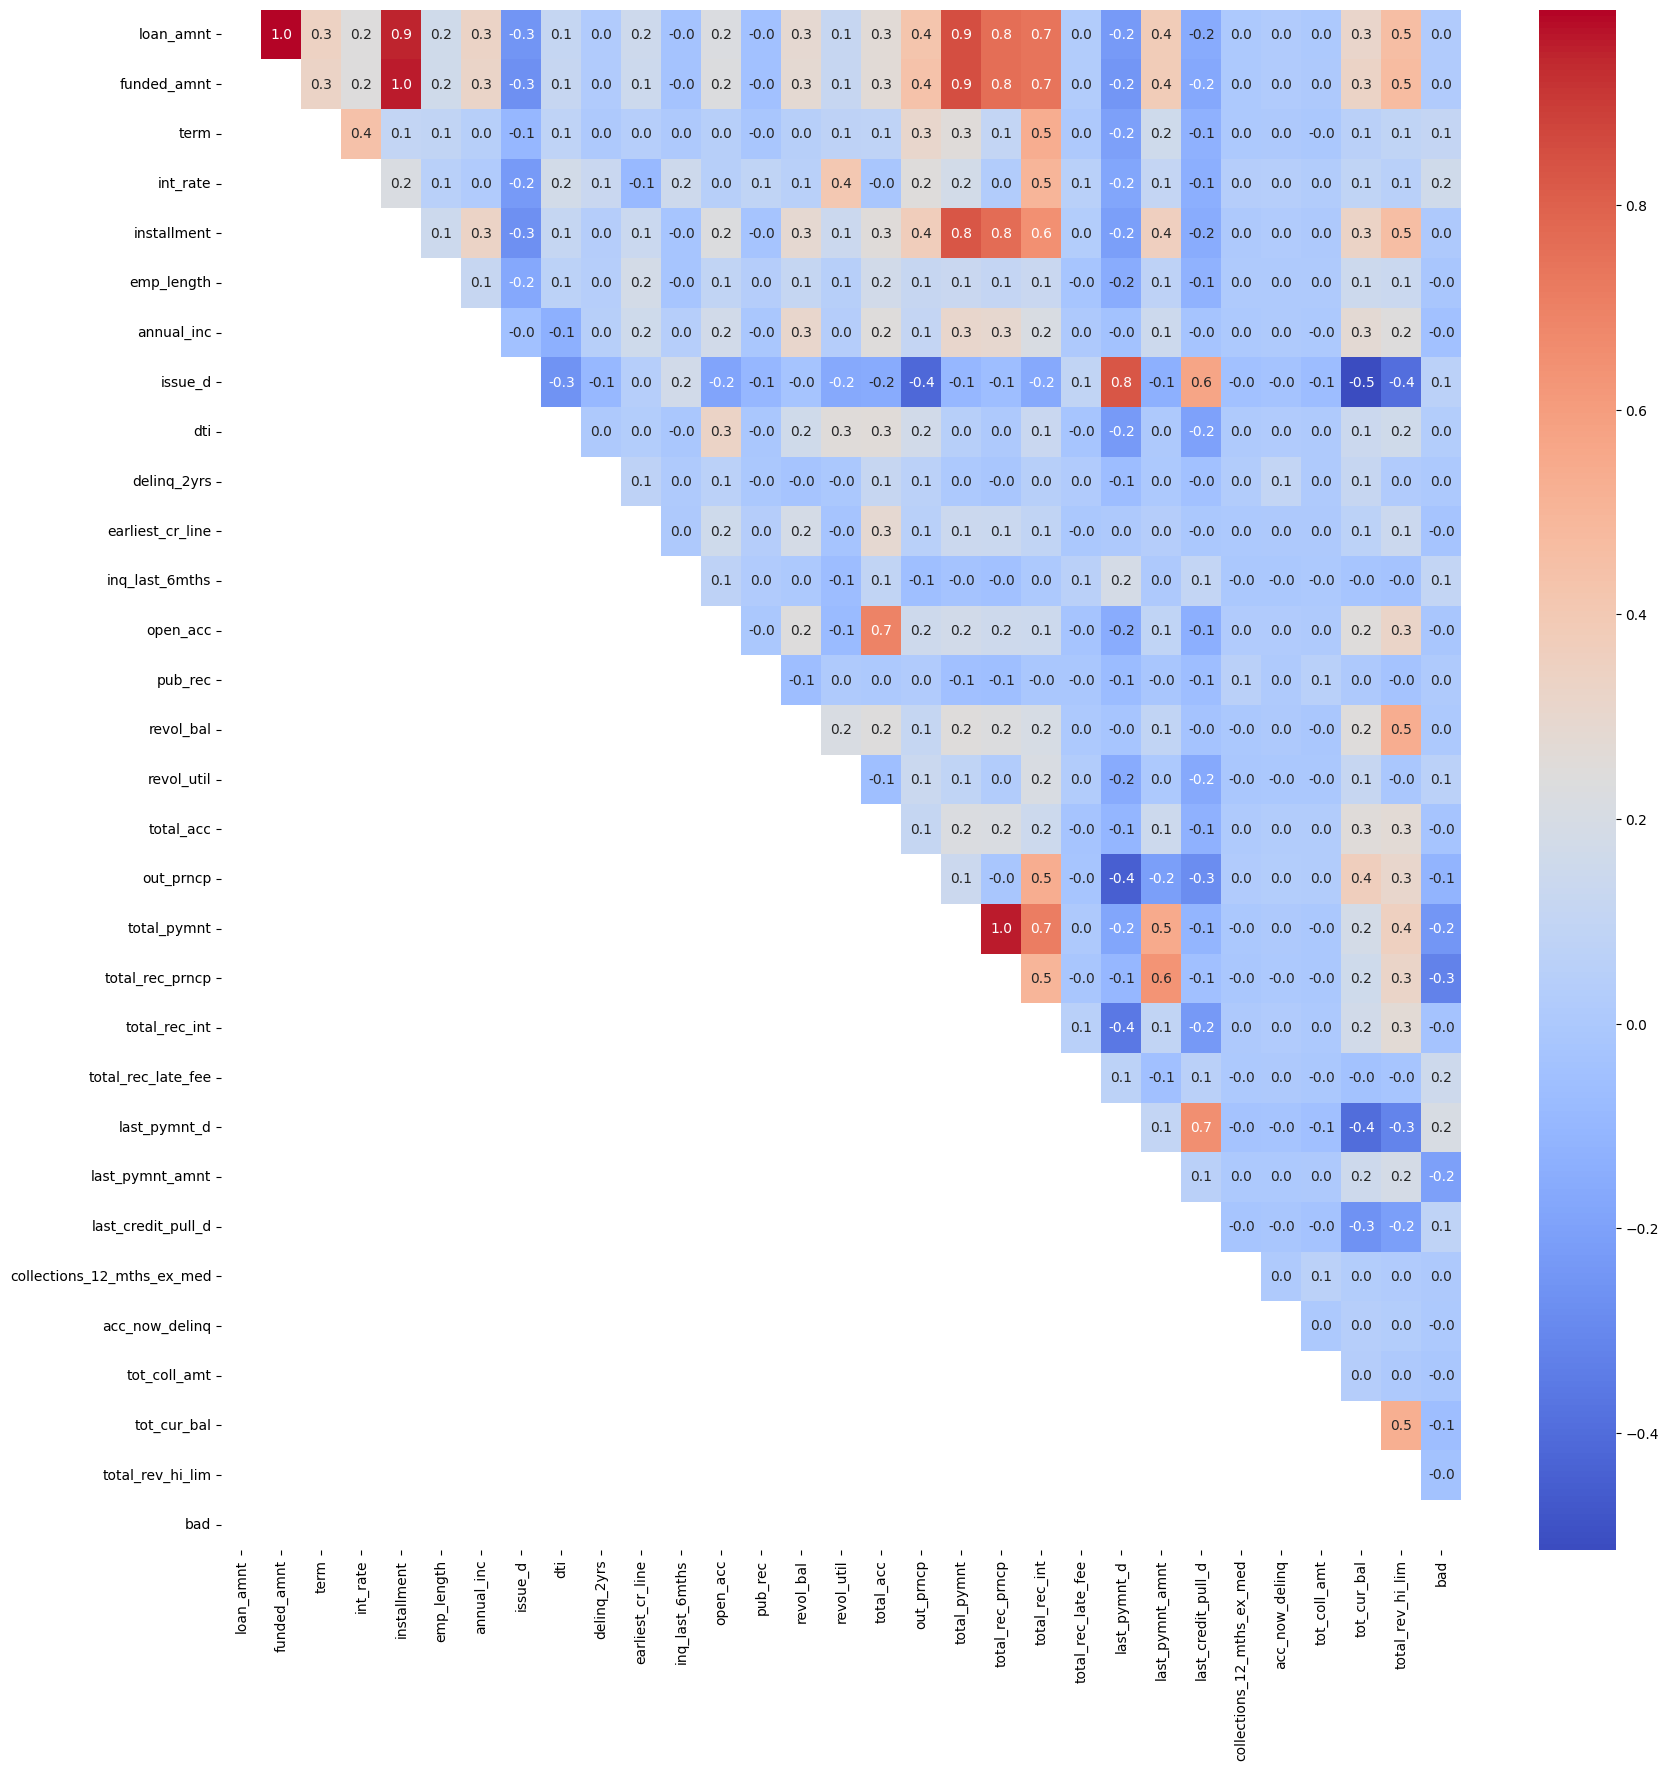

In [77]:
#create and apply mask
mask = corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1))

#create heatmap
plt.figure(figsize=(20,20))
sns.heatmap(mask, cmap='coolwarm', annot=True, fmt='.1f')

Multicollinearity: loan_amnt & installment, funded_amnt & installment, installment & total_pymnt, total_pymnt & total_rec_prncp, issue_d & last_payment_d, revol_bal & total_rev_hi_lim

In [78]:
# drop redundant features
df2 = df1.copy()
df2.drop(['installment', 'total_rec_prncp', 'last_pymnt_d', 'revol_bal'], axis=1, inplace=True)

# Feature Encoding

## Purpose

In [79]:
# one-hot encoding 'purpose'
dummy_purpose = pd.get_dummies(df2['purpose'], prefix='prps', dtype=int)
df2 = pd.concat([df2, dummy_purpose], axis=1)

In [80]:
df2.drop(['purpose'], axis=1, inplace=True)

## Grade

In [81]:
df2['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

Loans graded A have the lowest expected risk of loss.

In [82]:
# label encoding 'grade'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['grade']=le.fit_transform(df2['grade'])

In [83]:
df2['grade'].unique()

array([1, 2, 0, 4, 5, 3, 6])

## Home_ownership

In [84]:
# one-hot encoding 'home_ownership'
dummy_home = pd.get_dummies(df2['home_ownership'], prefix='home', dtype=int)
df2 = pd.concat([df2, dummy_home], axis=1)

In [85]:
df2.drop(['home_ownership'], axis=1, inplace=True)

## Verification_status

In [86]:
# label encoding 'verification_status'
map_ver = {'Not Verified':0, 'Verified':1, 'Source Verified':1}
df2['verification_status'] = df2['verification_status'].map(map_ver)

In [87]:
df2['verification_status'].unique()

array([1, 0])

## List_status

In [88]:
# label encoding 'initial_list_status'
df2['initial_list_status']=le.fit_transform(df2['initial_list_status'])

In [89]:
df2['initial_list_status'].unique()

array([0, 1, 2])

In [90]:
df2.shape

(76162, 49)

In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76162 entries, 0 to 76161
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   76162 non-null  int64  
 1   funded_amnt                 76162 non-null  int64  
 2   term                        76162 non-null  int64  
 3   int_rate                    76162 non-null  float64
 4   grade                       76162 non-null  int64  
 5   emp_length                  76162 non-null  float64
 6   annual_inc                  76162 non-null  float64
 7   verification_status         76162 non-null  int64  
 8   issue_d                     76162 non-null  int64  
 9   dti                         76161 non-null  float64
 10  delinq_2yrs                 76162 non-null  float64
 11  earliest_cr_line            76162 non-null  int64  
 12  inq_last_6mths              76162 non-null  float64
 13  open_acc                    761

# Feature Scaling

In [92]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [93]:
categorical_cols = [col for col in df2.select_dtypes(include='object').columns.tolist()]
numerical_cols = [col for col in df2.columns.tolist() if col not in categorical_cols + ['bad']]

In [94]:
# normalize all numerical data
scaler = StandardScaler()

df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

In [95]:
df2.head(3)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad,prps_car,prps_credit_card,prps_debt_consolidation,prps_educational,prps_home_improvement,prps_house,prps_major_purchase,prps_medical,prps_moving,prps_other,prps_renewable_energy,prps_small_business,prps_vacation,prps_wedding,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT
0,-0.963380,-0.957063,-0.593717,-0.580970,-0.512835,1.280189,-0.830494,0.738343,0.106776,1.707885,-0.328939,1.636865,0.027110,-1.528162,-0.248752,1.176587,-1.263291,-0.369081,-0.437137,-0.753470,-0.639277,-0.162378,-0.563746,-0.652751,-0.046401,-0.040137,-0.06849,-0.51012,-0.627082,0,-0.156554,2.047360,-1.040498,-0.074644,-0.255582,-0.084029,-0.195978,-0.116798,-0.100729,-0.288312,-0.039725,-0.177685,-0.084266,-0.115987,-0.972848,-0.010249,-0.042295,-0.301127,1.154325
1,-1.276226,-1.274023,1.684303,0.512122,0.214688,-1.323409,-0.725752,0.738343,0.106776,-1.919024,-0.328939,-0.229848,3.005511,-1.528162,-0.248752,-1.662081,-1.693304,-0.369081,-0.437137,-1.323499,-0.805499,-0.162378,-0.573827,0.930843,-0.046401,-0.040137,-0.06849,-0.51012,-0.736709,1,6.387591,-0.488434,-1.040498,-0.074644,-0.255582,-0.084029,-0.195978,-0.116798,-0.100729,-0.288312,-0.039725,-0.177685,-0.084266,-0.115987,-0.972848,-0.010249,-0.042295,-0.301127,1.154325
2,-1.288740,-1.286701,-0.593717,0.675376,0.214688,1.280189,-1.035579,-1.354384,0.106776,-0.868377,-0.328939,-0.562424,0.771711,-1.740128,-0.248752,1.742028,-1.177288,-0.369081,-0.437137,-1.089144,-0.739744,-0.162378,-0.470950,-0.652751,-0.046401,-0.040137,-0.06849,-0.51012,-0.741094,0,-0.156554,-0.488434,-1.040498,-0.074644,-0.255582,-0.084029,-0.195978,-0.116798,-0.100729,-0.288312,-0.039725,5.627924,-0.084266,-0.115987,-0.972848,-0.010249,-0.042295,-0.301127,1.154325


# Modeling - Train

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X = df2.drop('bad', axis=1)
y = df2['bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_train.shape, X_test.shape

((60929, 48), (15233, 48))

## Imbalance Resampling

In [99]:
# before resampling
y_train.value_counts()

,count
bad,
0,52929
1,8000


In [115]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Tangani nilai NaN
imputer = SimpleImputer(strategy='mean')  # Anda bisa memilih strategi yang sesuai
X_train = imputer.fit_transform(X_train)

# Terapkan SMOTE setelah nilai NaN ditangani
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [116]:
# after resampling
y_train.value_counts()

,count
bad,
0,52929
1,52929


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [118]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [120]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# Modeling - Evaluation

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate

In [109]:
def eval_classification(model):
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    y_pred_proba = model.predict_proba(X_test)

    # Generate predicted probabilities of positive class for training and test sets
    train_probabilities = model.predict_proba(X_train)[:, 1]
    test_probabilities = model.predict_proba(X_test)[:, 1]

    # Calculate KS statistic for training set
    fpr_train, tpr_train, _ = roc_curve(y_train, train_probabilities)
    ks_train = max(tpr_train - fpr_train)

    # Calculate KS statistic for test set
    fpr_test, tpr_test, _ = roc_curve(y_test, test_probabilities)
    ks_test = max(tpr_test - fpr_test)

    print(f"{model}")
    print("AUC (Train): %.4f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (Test): %.4f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("KS (Train): %.4f" % ks_train)
    print("KS (Test): %.4f" % ks_test)

## Logistic Regression

In [121]:
eval_classification(lr)

LogisticRegression()
AUC (Train): 0.9948
AUC (Test): 0.9851
KS (Train): 0.9554
KS (Test): 0.9145


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Decision Tree

In [111]:
eval_classification(dt)

DecisionTreeClassifier()
AUC (Train): 0.9998
AUC (Test): 0.9325
KS (Train): 0.9897
KS (Test): 0.8587


## Random Forest

In [122]:
eval_classification(rf)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier()
AUC (Train): 1.0000
AUC (Test): 0.9861
KS (Train): 1.0000
KS (Test): 0.8912


I am not tuning hyperparameter due to hardware capacity.

In [113]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('Feature Importance Score')

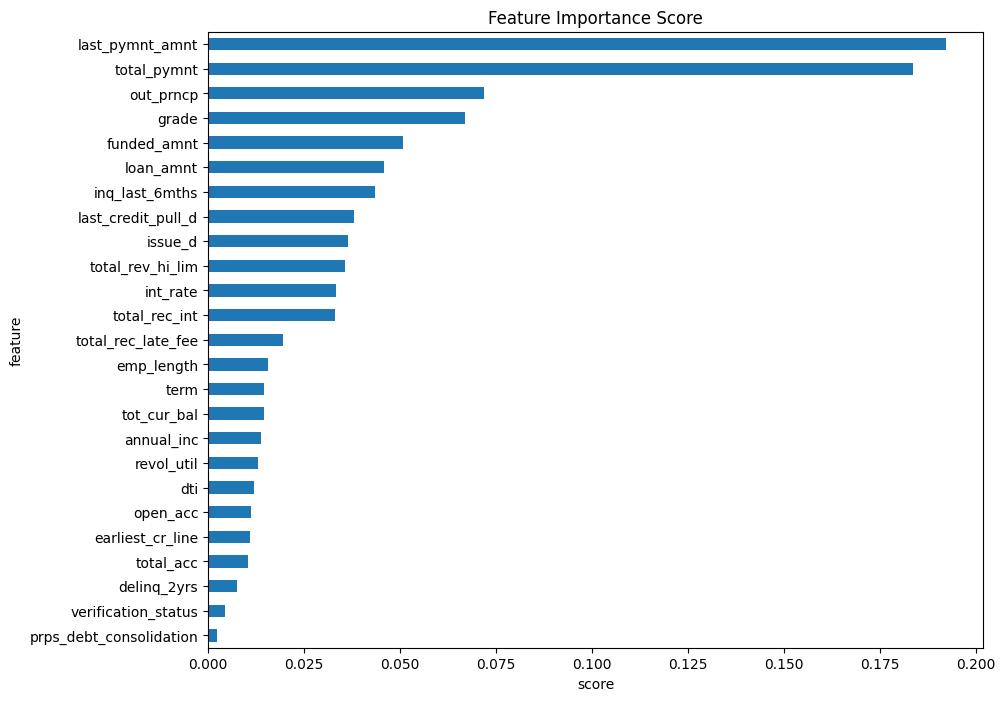

In [123]:
show_feature_importance(rf)

# Conclusion

The best fit model uses Random Forest algorithm and results in `AUC = 0.98` dan `KS = 0.87`.